In [1]:
import textacy
import seaborn as sns
from sklearn.decomposition import TruncatedSVD, SparsePCA
import pandas
import pandas as pd
import textacy.representations.vectorizers as vectorizers
import textacy.tm
import umap
import umap.plot

/home/dennislai/anaconda3/envs/P76I900/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
#corpus = textacy.Corpus.load("en_core_web_trf", "../../models/P76I900/HW4/wikinews_corpus.bin.gz")
corpus_food = textacy.Corpus.load("en_core_web_trf", "../../models/P76I900/HW4/wikinews_food_corpus.bin.gz")
corpus_health = textacy.Corpus.load("en_core_web_trf", "../../models/P76I900/HW4/wikinews_health_corpus.bin.gz")
corpus_poli = textacy.Corpus.load("en_core_web_trf", "../../models/P76I900/HW4/wikinews_politics_corpus.bin.gz")

In [3]:
food_wc = corpus_food.word_counts(by='lemma_', weighting='count', filter_stops=True, filter_punct=True)
health_wc = corpus_health.word_counts(by='lemma_', weighting='count', filter_stops=True, filter_punct=True)
poli_wc =corpus_poli.word_counts(by='lemma_', weighting='count', filter_stops=True, filter_punct=True)

In [5]:
top_words_food = sorted(food_wc.items(), key=lambda x:x[1], reverse=True)
top_words_food[:10]

[('say', 382),
 ('food', 304),
 ('finger', 241),
 ('Wikinews', 204),
 ('find', 202),
 ('2005', 194),
 ('Wendy', 193),
 ('April', 177),
 ('2021', 171),
 ('year', 157)]

In [7]:
top_words_health = sorted(health_wc.items(), key=lambda x:x[1], reverse=True)
top_words_health[:10]

[('say', 2288),
 ('Wikinews', 1426),
 ('2021', 1191),
 ('year', 1123),
 ('write', 1015),
 ('article', 974),
 ('2006', 967),
 ('people', 964),
 ('2007', 924),
 ('2005', 881)]

In [8]:
top_words_poli = sorted(poli_wc.items(), key=lambda x:x[1], reverse=True)
top_words_poli[:10]

[('say', 2288),
 ('Wikinews', 1426),
 ('2021', 1191),
 ('year', 1123),
 ('write', 1015),
 ('article', 974),
 ('2006', 967),
 ('people', 964),
 ('2007', 924),
 ('2005', 881)]

<AxesSubplot:>

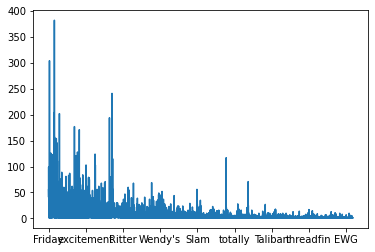

In [11]:
df = pandas.Series(food_wc)
df.plot()

In [17]:
corpus_health[0]

Tuesday, April 7, 2009  LGBT Related articles DaBaby Levitating remix losing US radio audiences after the rapper's comments on HIV/AIDS Taiwan's legislature first in Asia to legalize same-sex marriage Toronto serial killer Bruce McArthur pleads guilty to eight murders 22nd annual ILGA-Europe conference meets in Brussels: in pictures In pictures: thousands attend 16th annual Taiwan Pride Collaborate! Pillars of Wikinews writing Writing an article Vermont is now the fourth state in the United States where same-sex marriage is legal. Vermont lawmakers overrode Governor Jim Douglas' veto on Tuesday to permit gays and lesbians in the state to marry. The state Senate voted 23–5 in favor of overriding the Governor's veto and the House followed up with a 100–49 vote. Two Senators were not in attendance and House Representative Sonny Audette did not vote. Vermont's constitution requires the votes of at least two-thirds of the House and Senate to override a veto. Governor Douglas spoke out about

In [18]:
# TF-IDF Bad of Words Matrix
vectorizer = vectorizers.Vectorizer(tf_type='linear', idf_type='smooth')

tokenized_food = ((term.lemma_ for term in textacy.extract.terms(doc, ngs=1, ents=True, ncs=True, dedupe=True)) for doc in corpus_food)
tokenized_health = ((term.lemma_ for term in textacy.extract.terms(doc, ngs=1, ents=True, ncs=True, dedupe=True)) for doc in corpus_health)
tokenized_poli = ((term.lemma_ for term in textacy.extract.terms(doc, ngs=1, ents=True, ncs=True, dedupe=True)) for doc in corpus_poli)


dot_food = vectorizer.fit_transform(tokenized_food)
dot_health = vectorizer.fit_transform(tokenized_health)
dot_poli = vectorizer.fit_transform(tokenized_poli)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

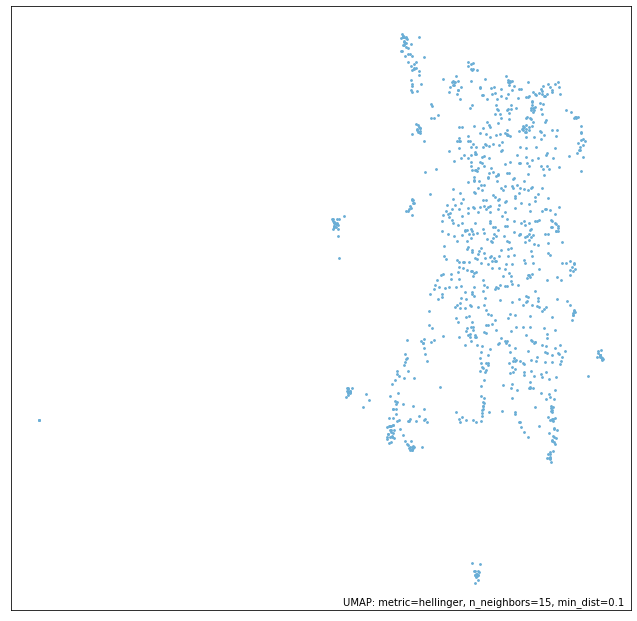

In [21]:
#Try Umap
mapper = umap.UMAP(metric='hellinger', random_state=42).fit(dot_health)
umap.plot.points(mapper)